El conjunto de datos de diamantes ("diamonds.csv") es un dataset popular que contiene información detallada sobre las características y precios de diamantes. Este dataset es comúnmente utilizado en análisis de datos y machine learning para tareas de regresión (predicción de precios) y análisis exploratorio de datos

carat: El peso del diamante (en quilates). Es una de las características más importantes que influyen en el precio de un diamante.

cut: La calidad del corte del diamante, generalmente categorizada como:

* Fair (Regular)
* Good (Bueno)
* Very Good (Muy Bueno)
* Premium
* Ideal

color: El grado de color del diamante, con una clasificación que generalmente va desde 'D' (mejor calidad, sin color) hasta 'J' (más amarillo).

clarity: El grado de claridad del diamante, que refleja la pureza o ausencia de inclusiones. Se clasifica de la siguiente manera:

* IF (Internally Flawless)
* VVS1 (Very Very Slightly Included 1)
* VVS2 (Very Very Slightly Included 2)
* VS1 (Very Slightly Included 1)
* VS2 (Very Slightly Included 2)
* SI1 (Slightly Included 1)
* SI2 (Slightly Included 2)
* I1 (Included)

depth: La profundidad total del diamante como porcentaje de su ancho, calculada como (z / mean(x, y)) * 100, donde z es la altura y x e y son las dimensiones horizontales.

table: El ancho de la parte superior del diamante en relación con su anchura total.

price: El precio del diamante en dólares.

x, y, z: Las dimensiones de un diamante (largo, ancho y profundidad en milímetros).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
import numpy as np

# Importación de bibliotecas necesarias

* import pandas as pd  # Importa pandas, una biblioteca para manipulación y análisis de datos estructurados (tablas, series de tiempo, etc.)
* from sklearn.linear_model import LinearRegression  # Importa la clase LinearRegression para crear un modelo de regresión lineal
* from sklearn.model_selection import train_test_split  # Permite dividir el conjunto de datos en conjuntos de entrenamiento y prueba
* from sklearn.model_selection import cross_val_score  # Permite realizar validación cruzada para evaluar el rendimiento del modelo
* from sklearn.model_selection import LeaveOneOut  # Realiza validación cruzada Leave-One-Out, una técnica que utiliza una sola muestra para prueba y el resto para entrenamiento en cada iteración
* from sklearn.metrics import mean_squared_error  # Importa la métrica del error cuadrático medio (MSE) para evaluar el rendimiento del modelo
* import numpy as np  # Importa NumPy, una biblioteca para realizar operaciones numéricas y trabajar con arrays


In [2]:
model = LinearRegression()

LinearRegression(): Es una clase en scikit-learn que se utiliza para ajustar un modelo de regresión lineal.
El modelo de regresión lineal busca una relación lineal entre las variables independientes (X) y la variable dependiente (y).
Este modelo intenta ajustar una línea recta que minimice la suma de los errores al cuadrado entre los valores reales y los valores predichos.

In [3]:
# Cargar el conjunto de datos desde un archivo CSV
df = pd.read_csv("https://waf.cs.illinois.edu/discovery/diamonds.csv")  # Lee el archivo CSV de la URL y lo carga en un DataFrame de pandas

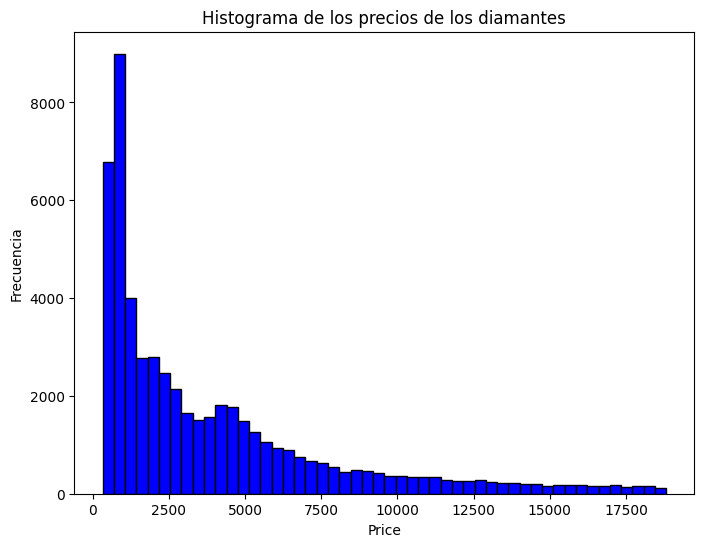

In [4]:
# Crear el histograma para la variable 'price'
plt.figure(figsize=(8,6))
plt.hist(df['price'], bins=50, color='blue', edgecolor='black')
plt.title('Histograma de los precios de los diamantes')
plt.xlabel('Price')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()

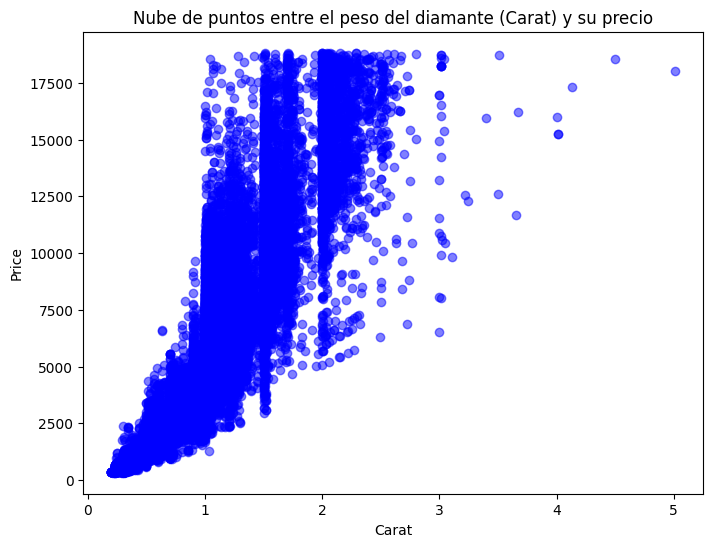

In [20]:
# Crear una nube de puntos (scatter plot) entre 'price' y 'carat'
plt.figure(figsize=(8,6))
plt.scatter(df['carat'], df['price'], color='blue', alpha=0.5)
plt.title('Nube de puntos entre el peso del diamante (Carat) y su precio')
plt.xlabel('Carat')
plt.ylabel('Price')

# Mostrar la gráfica
plt.show()

In [5]:
correlation = df['carat'].corr(df['price'])
print(f"Correlación entre Carat y Price: {correlation}")

Correlación entre Carat y Price: 0.9215913011934762


In [6]:
model = model.fit( df[ ["carat"] ], df["price"] )

model.fit(X, y):
fit() es el método utilizado para entrenar un modelo en scikit-learn.
Toma dos parámetros:
X: Las características (o variables independientes) que se utilizarán para hacer las predicciones. En este caso, df[["carat"]] es una tabla (DataFrame) con una sola columna, carat, que representa el peso del diamante.
y: La variable objetivo (o variable dependiente) que se intenta predecir. En este caso, df["price"] es la columna que contiene los precios de los diamantes.

In [7]:
X = df.drop(["price"], axis = 1)
y = df["price"]

X = df.drop(["price"], axis=1):

df.drop(): Este método se utiliza para eliminar columnas o filas de un DataFrame.
["price"]: Especifica que la columna price debe ser eliminada.
axis=1: Indica que la eliminación se hará a nivel de columnas (en lugar de filas, que serían axis=0).
Resultado: X será un nuevo DataFrame que contiene todas las columnas del DataFrame original excepto la columna price. Estas columnas serán las características (features) que el modelo usará para entrenarse. En este caso, podrían incluir variables como carat, cut, color, clarity, etc.

y = df["price"]:

Selecciona la columna price como la variable objetivo (target), es decir, lo que el modelo va a intentar predecir.
y será una Serie de pandas que contiene los precios de los diamantes.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, random_state=13)

* train_test_split(): Esta función de scikit-learn se utiliza para dividir un conjunto de datos en dos subconjuntos: uno de entrenamiento (training set) y otro de prueba (test set). Esto es importante para evaluar el rendimiento del modelo en datos no vistos.

Parámetros:

* X: Las características (variables independientes) que se van a utilizar para entrenar el modelo. En este caso, es el DataFrame que contiene todas las columnas excepto price.
* y: La variable objetivo (dependiente), que es la columna price, el precio de los diamantes.

test_size=0.25:

Define el tamaño del conjunto de prueba. Aquí se indica que el 25% de los datos se utilizarán para pruebas y el 75% restante para el entrenamiento.
Específicamente, 75% de las filas serán asignadas al conjunto de entrenamiento y 25% al conjunto de prueba.
random_state=107:

Fija una semilla para la aleatoriedad del proceso de división, lo que garantiza que la división sea reproducible. Cada vez que se ejecuta el código con el mismo valor de random_state, la división de los datos será la misma. Esto es útil para obtener resultados consistentes durante el desarrollo y evaluación del modelo.

In [31]:
model.fit(X_train[["carat"]], y_train)
pred = model.predict(X_test[["carat"]])

* Entrenamiento: El modelo se entrena usando el peso del diamante (carat) como predictor y los precios del conjunto de entrenamiento (y_train).

* Predicción: Una vez entrenado, el modelo utiliza el peso del diamante del conjunto de prueba (X_test[["carat"]]) para predecir los precios y almacenar las predicciones en pred.

In [33]:
RMSE = mean_squared_error(y_test, pred, squared=False)
#RMSE = root_mean_squared_error(y_test, pred, squared=False) 
print("Root Mean Squared Error (RMSE):", RMSE)

Root Mean Squared Error (RMSE): 1560.9981651444689


C:\Users\gabriel.guzman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


* mean_squared_error(y_test, pred, squared=False):
*  mean_squared_error(): Es una función de scikit-learn que calcula el error cuadrático medio (MSE), que mide el promedio de los cuadrados de las diferencias entre los valores reales (y_test) y las predicciones del modelo (pred).

Parámetros:
* y_test: Los valores reales de los precios de los diamantes en el conjunto de prueba.
* pred: Los valores predichos por el modelo para el conjunto de prueba.
* squared=False: Al establecer este parámetro como False, la función devuelve la raíz cuadrada del error cuadrático medio (RMSE) en lugar del MSE.

RMSE: Es la Raíz del Error Cuadrático Medio, que es una métrica comúnmente utilizada para evaluar modelos de regresión. Se interpreta en las mismas unidades que la variable objetivo (en este caso, precios). Cuanto menor sea el RMSE, mejor se ajusta el modelo a los datos.

El RMSE es una medida de la magnitud promedio del error en las predicciones del modelo. Si el RMSE es bajo, significa que el modelo está haciendo predicciones cercanas a los valores reales. Si es alto, significa que hay una diferencia considerable entre las predicciones y los valores reales.

Si el RMSE es, por ejemplo, 500, esto significa que, en promedio, las predicciones del precio del diamante tienen un error de aproximadamente 500 unidades monetarias (dependiendo de la moneda utilizada en los datos).

In [44]:
k_fold_cv = 3

In [45]:
score_kfold = cross_val_score(model, X[["carat"]], y, cv=k_fold_cv, scoring="neg_mean_squared_error")

realiza una validación cruzada utilizando K folds (en este caso, 5 folds) y calcula el error cuadrático medio negativo (MSE negativo) en cada partición.

La métrica elegida es el Mean Squared Error (MSE), pero en scikit-learn, cuando se utiliza esta métrica en validación cruzada, devuelve el valor negativo del MSE.
Esto es porque scikit-learn por defecto maximiza las puntuaciones (y un MSE más bajo es mejor), por lo que utiliza el negativo de esta métrica para mantener la consistencia. Posteriormente, se puede convertir a positivo

In [46]:
np.sqrt(np.abs(score_kfold))

array([1796.94931261, 3264.02524   ,  794.18752032])

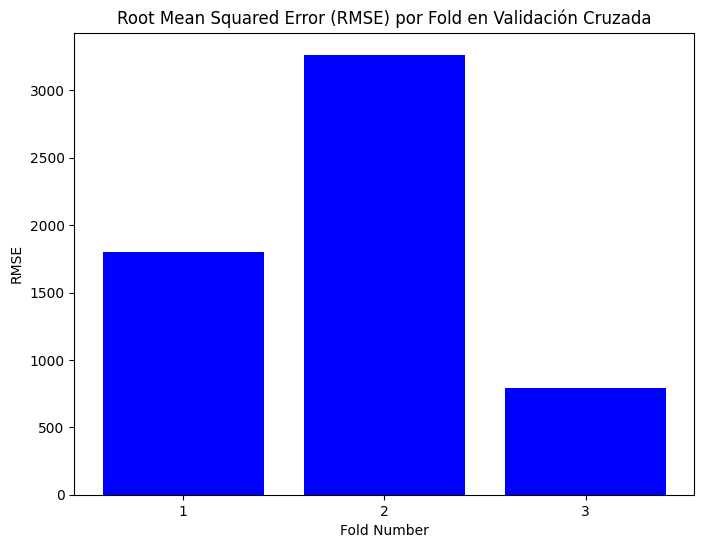

In [47]:
rmse_scores = np.sqrt(np.abs(score_kfold))

# Crear una gráfica de barras
plt.figure(figsize=(8,6))
plt.bar(range(1, len(rmse_scores) + 1), rmse_scores, color='blue')
plt.xlabel('Fold Number')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (RMSE) por Fold en Validación Cruzada')
plt.xticks(range(1, len(rmse_scores) + 1))

# Mostrar la gráfica
plt.show()

In [39]:
RMSE_kfold = np.sqrt(np.abs(score_kfold).mean())
# Print the RMSE for k-fold cross-validation
print("Root Mean Squared Error (k-fold CV):", RMSE_kfold)

Root Mean Squared Error (k-fold CV): 1938.0324820008425


En este caso, los valores de RMSE varían bastante, con un mínimo de ~626 y un máximo de ~3500. Esta diferencia puede ser un indicativo de que el modelo tiene dificultades para generalizar bien en algunos folds (donde RMSE es alto) mientras que en otros el error es significativamente más bajo.

El valor de 3500.63 es significativamente mayor que el resto, lo que sugiere que en al menos un fold, el modelo está teniendo dificultades para predecir los valores correctamente. Esto podría ser causado por una distribución particular de los datos en ese fold, lo que indica que el modelo no es robusto para generalizar en todos los subconjuntos.